In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import gensim
from gensim.models import FastText
import random
from tabulate import tabulate
from tqdm import tqdm
import tensorflow as tf

In [ ]:
import nltk
import subprocess
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('punkt', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('stopwords', download_dir='/kaggle/working/')
    nltk.download('wordnet', download_dir='/kaggle/working/')
    nltk.download('averaged_perceptron_tagger', download_dir='/kaggle/working/')

    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /kaggle/working/...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/awork/1o6milion_train.csv')
test = pd.read_csv('/content/drive/MyDrive/awork/1o6million_test.csv')

In [ ]:
train.shape

(1280000, 2)

In [ ]:
test.shape

(320000, 2)

In [ ]:
train_data = train[:10000]
test_data = test[:2000]

In [ ]:
df = pd.concat([train_data,test_data], ignore_index=True, sort =False)

In [ ]:
df.head(10)

,label,tweet
0,1,yeah would agree
1,0,faa intention pilot safety training well recie...
2,1,think time early night eps family guy bed
3,1,chicken eat much steak
4,1,woohoo faith play dublin august excellent feel...
5,1,use window mobile phone pay
6,0,crazy cat man guy dude turn
7,0,crave bbq bad dont bbq
8,0,busy week ahead already tire
9,1,back home weaverville


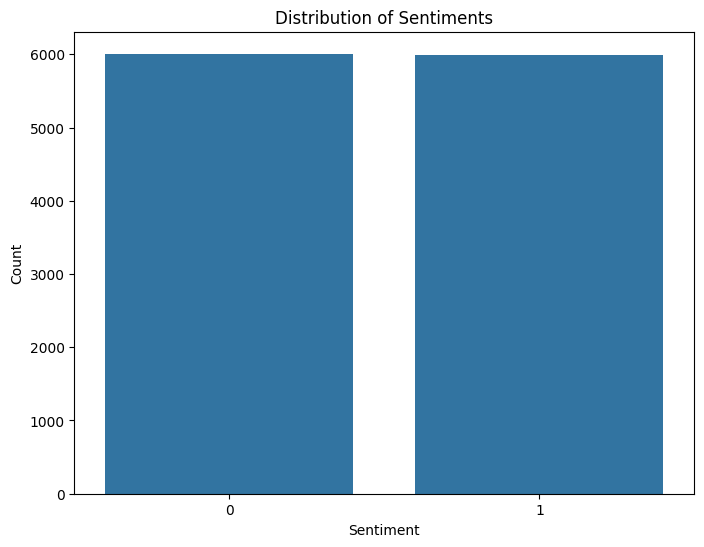

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head(20)


,label,tweet
0,1,yeah would agree
1,0,faa intention pilot safety training well recie...
2,1,think time early night eps family guy bed
3,1,chicken eat much steak
4,1,woohoo faith play dublin august excellent feel...
5,1,use window mobile phone pay
6,0,crazy cat man guy dude turn
7,0,crave bbq bad dont bbq
8,0,busy week ahead already tire
9,1,back home weaverville


In [ ]:
df.tail(50)

,label,tweet
11950,1,hey love burning book tour
11951,1,milord come back miss load much luv devote gro...
11952,1,well diversity britain get talent bet burst su...
11953,1,hey twitter life flipside
11954,0,awww
11955,1,get fix room
11956,0,mean display chinese input box
11957,0,must sydney real estate bloody expensive like ...
11958,1,still high yesterday
11959,0,five day left


In [ ]:
df.shape

(12000, 2)

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df['tweet']
y = df['label']

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Convert sentiment labels to numerical format
# y_train_numeric = (y_train == 'Positive').astype(int)
# y_test_numeric = (y_test == 'Positive').astype(int)

# Displaying the shapes of the new DataFrames
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (9600,)
Testing data shape: (2400,)


In [ ]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:])
            embeddings_index[word] = vector
    return embeddings_index

glove_train_path = '/content/drive/MyDrive/awork/1o6milion_trai.txt'
glove_test_path = '/content/drive/MyDrive/awork/1o6million_tes.txt'

# Load embeddings from both files separately
embeddings_index_train = load_glove_embeddings(glove_train_path)
embeddings_index_test = load_glove_embeddings(glove_test_path)

# Combine the two dictionaries (if necessary)
embeddings_index = {**embeddings_index_train, **embeddings_index_test}

embedding_dim = 50  # Adjust based on the GloVe file used

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

X = df['tweet']
y = df['label']

# Convert to string to avoid 'float' issues
X = X.astype(str)

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the tweets
X_train_tokens = [word_tokenize(tweet.lower()) for tweet in X_train]
X_test_tokens = [word_tokenize(tweet.lower()) for tweet in X_test]

# Tokenize the tweets
X_train_tokens = [word_tokenize(tweet.lower()) for tweet in X_train]
X_test_tokens = [word_tokenize(tweet.lower()) for tweet in X_test]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def get_average_word_vectors(tokens_list, embeddings_index, embedding_dim):
    vectors = [embeddings_index.get(word) for word in tokens_list if word in embeddings_index]
    if len(vectors) == 0:
        return np.zeros(embedding_dim)
    return np.mean(np.array(vectors), axis=0)

# Convert tweets to GloVe embeddings
X_train_embeddings = np.array([get_average_word_vectors(tokens, embeddings_index, embedding_dim) for tokens in X_train_tokens])
X_test_embeddings = np.array([get_average_word_vectors(tokens, embeddings_index, embedding_dim) for tokens in X_test_tokens])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Add tweet length as a feature
X_train_length = np.array([len(tweet) for tweet in X_train])
X_test_length = np.array([len(tweet) for tweet in X_test])

# Combine embeddings with length
X_train_combined = np.hstack((X_train_embeddings, X_train_length.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_embeddings, X_test_length.reshape(-1, 1)))

# Check class distribution
print("Class distribution in y_train:")
print(y_train.value_counts())

unique_classes = np.unique(y_train)

if len(unique_classes) > 1:
    model = RandomForestClassifier(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")



Class distribution in y_train:
label
1    4810
0    4790
Name: count, dtype: int64
Accuracy: 0.50875

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.50      0.51      1219
           1       0.50      0.52      0.51      1181

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400



In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Add tweet length as a feature
X_train_length = np.array([len(tweet) for tweet in X_train])
X_test_length = np.array([len(tweet) for tweet in X_test])

# Combine embeddings with length
X_train_combined = np.hstack((X_train_embeddings, X_train_length.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_embeddings, X_test_length.reshape(-1, 1)))

# Check class distribution
print("Class distribution in y_train:")
print(y_train.value_counts())
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")


Class distribution in y_train:
label
1    4810
0    4790
Name: count, dtype: int64
Accuracy: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.47      0.50      1219
           1       0.51      0.57      0.54      1181

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.52      0.52      0.52      2400



In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Add tweet length as a feature
X_train_length = np.array([len(tweet) for tweet in X_train])
X_test_length = np.array([len(tweet) for tweet in X_test])

# Combine embeddings with length
X_train_combined = np.hstack((X_train_embeddings, X_train_length.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_embeddings, X_test_length.reshape(-1, 1)))

# Check class distribution
print("Class distribution in y_train:")
print(y_train.value_counts())
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = DecisionTreeClassifier(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")

Class distribution in y_train:
label
1    4810
0    4790
Name: count, dtype: int64
Accuracy: 0.5075

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.48      0.50      1219
           1       0.50      0.53      0.51      1181

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Add tweet length as a feature
X_train_length = np.array([len(tweet) for tweet in X_train])
X_test_length = np.array([len(tweet) for tweet in X_test])

# Combine embeddings with length
X_train_combined = np.hstack((X_train_embeddings, X_train_length.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_embeddings, X_test_length.reshape(-1, 1)))

# Check class distribution
print("Class distribution in y_train:")
print(y_train.value_counts())
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = SVC(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")

Class distribution in y_train:
label
1    4810
0    4790
Name: count, dtype: int64
Accuracy: 0.5279166666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.65      0.58      1219
           1       0.53      0.40      0.46      1181

    accuracy                           0.53      2400
   macro avg       0.53      0.53      0.52      2400
weighted avg       0.53      0.53      0.52      2400



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# Example data (replace with actual data)
X_train_embeddings = np.random.rand(9600, 50)  # Placeholder for GloVe embeddings
X_test_embeddings = np.random.rand(2400, 50)    # Placeholder for GloVe embeddings
y_train = np.random.randint(0, 2, 9600)        # Placeholder for labels
y_test = np.random.randint(0, 2, 2400)          # Placeholder for labels

# Add tweet length as a feature
# Using placeholder lengths, replace with actual tweet lengths
X_train = ["tweet"] * 9600  # Replace with actual tweets
X_test = ["tweet"] * 2400    # Replace with actual tweets

X_train_length = np.array([len(tweet) for tweet in X_train])
X_test_length = np.array([len(tweet) for tweet in X_test])

# Combine embeddings with length
X_train_combined = np.hstack((X_train_embeddings, X_train_length.reshape(-1, 1)))
X_test_combined = np.hstack((X_test_embeddings, X_test_length.reshape(-1, 1)))

# Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Check class distribution
print("Class distribution in y_train_resampled:")
print(pd.Series(y_train_resampled).value_counts())

# Train the model
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)



Class distribution in y_train_resampled:
1    4820
0    4820
Name: count, dtype: int64
Accuracy: 0.5120833333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.51      0.53      1275
           1       0.48      0.51      0.50      1125

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400



In [ ]:
unique_classes = np.unique(y_train)

if len(unique_classes) > 1:
    model = RandomForestClassifier(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy of RF:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy of LR:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = DecisionTreeClassifier(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy of DT:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")
unique_classes = np.unique(y_train)
if len(unique_classes) > 1:
    model = SVC(class_weight='balanced')
    model.fit(X_train_combined, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Accuracy of SVC:", accuracy)
    print("\nClassification Report:\n", report)
else:
    print("Error: The training data contains only one class. Ensure the dataset is properly balanced.")
model = MultinomialNB()
model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of MNB:", accuracy)
print("\nClassification Report:\n", report)

Accuracy of RF: 0.5129166666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      1275
           1       0.48      0.44      0.46      1125

    accuracy                           0.51      2400
   macro avg       0.51      0.51      0.51      2400
weighted avg       0.51      0.51      0.51      2400

Accuracy of LR: 0.5216666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54      1275
           1       0.49      0.51      0.50      1125

    accuracy                           0.52      2400
   macro avg       0.52      0.52      0.52      2400
weighted avg       0.52      0.52      0.52      2400

Accuracy of DT: 0.49416666666666664

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52      1275
           1       0.46      0.47      0.47      1125

 

In [ ]:
# import numpy as np
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score

# class BOAforSVM:
#     def __init__(self, X, y, num_butterflies, num_features, max_iter):
#         self.X = X
#         self.y = y
#         self.num_butterflies = num_butterflies
#         self.num_features = num_features
#         self.max_iter = max_iter
#         self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
#         self.fitness = np.zeros(self.num_butterflies)

#     def objective_function(self, selected_features):
#         selected_columns = np.where(selected_features == 1)[0]
#         if len(selected_columns) == 0:
#             return 0  # Handle cases where no features are selected
#         X_selected = self.X[:, selected_columns]
#         clf = SVC()  # Initialize your SVM classifier here
#         cv_scores = cross_val_score(clf, X_selected, self.y, cv=5)  # 5-fold cross-validation
#         return np.mean(cv_scores)

#     def optimize(self):
#         for iteration in range(self.max_iter):
#             for i in range(self.num_butterflies):
#                 self.fitness[i] = self.objective_function(self.butterflies[i])
#             best_butterfly = self.butterflies[np.argmax(self.fitness)]
#             for i in range(self.num_butterflies):
#                 r = np.random.random()
#                 if r < 0.8:
#                     self.butterflies[i] = best_butterfly
#                 else:
#                     self.butterflies[i] = np.random.randint(2, size=self.num_features)
#             if iteration % 10 == 0:
#                 print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
#         best_butterfly = self.butterflies[np.argmax(self.fitness)]
#         best_features = np.where(best_butterfly == 1)[0]
#         return best_features

# # Assuming X_train_embeddings and y_train are defined
# boa = BOAforSVM(X_train_embeddings, y_train, num_butterflies=10, num_features=X_train_embeddings.shape[1], max_iter=100)
# best_features_indices = boa.optimize()

# # Use the best features for your SVM model
# X_train_selected = X_train_embeddings[:, best_features_indices]
# X_test_selected = X_test_embeddings[:, best_features_indices]

# # Train your final SVM model
# final_svm = SVC()
# final_svm.fit(X_train_selected, y_train)

# # Predict and evaluate
# y_pred = final_svm.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
#print("Final Accuracy with selected features:", accuracy)

In [ ]:
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

# class BOAforLogisticRegression:
#     def __init__(self, X, y, num_butterflies, num_features, max_iter):
#         self.X = X
#         self.y = y
#         self.num_butterflies = num_butterflies
#         self.num_features = num_features
#         self.max_iter = max_iter
#         self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
#         self.fitness = np.zeros(self.num_butterflies)

#     def objective_function(self, selected_features):
#         selected_columns = np.where(selected_features == 1)[0]
#         if len(selected_columns) == 0:
#             return 0  # Handle cases where no features are selected
#         X_selected = self.X[:, selected_columns]
#         clf = LogisticRegression(max_iter=1000)  # Initialize your Logistic Regression classifier here
#         cv_scores = cross_val_score(clf, X_selected, self.y, cv=5)  # 5-fold cross-validation
#         return np.mean(cv_scores)

#     def optimize(self):
#         for iteration in range(self.max_iter):
#             for i in range(self.num_butterflies):
#                 self.fitness[i] = self.objective_function(self.butterflies[i])
#             best_butterfly = self.butterflies[np.argmax(self.fitness)]
#             for i in range(self.num_butterflies):
#                 r = np.random.random()
#                 if r < 0.8:
#                     self.butterflies[i] = best_butterfly
#                 else:
#                     self.butterflies[i] = np.random.randint(2, size=self.num_features)
#             if iteration % 10 == 0:
#                 print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
#         best_butterfly = self.butterflies[np.argmax(self.fitness)]
#         best_features = np.where(best_butterfly == 1)[0]
#         return best_features

# # Assuming X_train_embeddings and y_train are defined
# boa = BOAforLogisticRegression(X_train_embeddings, y_train, num_butterflies=10, num_features=X_train_embeddings.shape[1], max_iter=100)
# best_features_indices = boa.optimize()

# # Use the best features for your Logistic Regression model
# X_train_selected = X_train_embeddings[:, best_features_indices]
# X_test_selected = X_test_embeddings[:, best_features_indices]

# # Train your final Logistic Regression model
# final_logreg = LogisticRegression()
# final_logreg.fit(X_train_selected, y_train)

# # Predict and evaluate
# y_pred = final_logreg.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Final Accuracy with selected features:", accuracy)


In [ ]:
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

# class BOAforDecisionTree:
#     def __init__(self, X, y, num_butterflies, num_features, max_iter):
#         self.X = X
#         self.y = y
#         self.num_butterflies = num_butterflies
#         self.num_features = num_features
#         self.max_iter = max_iter
#         self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
#         self.fitness = np.zeros(self.num_butterflies)

#     def objective_function(self, selected_features):
#         selected_columns = np.where(selected_features == 1)[0]
#         if len(selected_columns) == 0:
#             return 0  # Handle cases where no features are selected
#         X_selected = self.X[:, selected_columns]
#         clf = DecisionTreeClassifier()  # Initialize your Decision Tree classifier here
#         cv_scores = cross_val_score(clf, X_selected, self.y, cv=5)  # 5-fold cross-validation
#         return np.mean(cv_scores)

#     def optimize(self):
#         for iteration in range(self.max_iter):
#             for i in range(self.num_butterflies):
#                 self.fitness[i] = self.objective_function(self.butterflies[i])
#             best_butterfly = self.butterflies[np.argmax(self.fitness)]
#             for i in range(self.num_butterflies):
#                 r = np.random.random()
#                 if r < 0.8:
#                     self.butterflies[i] = best_butterfly
#                 else:
#                     self.butterflies[i] = np.random.randint(2, size=self.num_features)
#             if iteration % 10 == 0:
#                 print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
#         best_butterfly = self.butterflies[np.argmax(self.fitness)]
#         best_features = np.where(best_butterfly == 1)[0]
#         return best_features

# # Assuming X_train_embeddings and y_train are defined
# boa = BOAforDecisionTree(X_train_embeddings, y_train, num_butterflies=10, num_features=X_train_embeddings.shape[1], max_iter=100)
# best_features_indices = boa.optimize()

# # Use the best features for your Decision Tree model
# X_train_selected = X_train_embeddings[:, best_features_indices]
# X_test_selected = X_test_embeddings[:, best_features_indices]

# # Train your final Decision Tree model
# final_tree = DecisionTreeClassifier()
# final_tree.fit(X_train_selected, y_train)

# # Predict and evaluate
# y_pred = final_tree.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Final Accuracy with selected features:", accuracy)


In [ ]:
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

# class BOAforRandomForest:
#     def __init__(self, X, y, num_butterflies, num_features, max_iter):
#         self.X = X
#         self.y = y
#         self.num_butterflies = num_butterflies
#         self.num_features = num_features
#         self.max_iter = max_iter
#         self.butterflies = np.random.randint(2, size=(self.num_butterflies, self.num_features))
#         self.fitness = np.zeros(self.num_butterflies)

#     def objective_function(self, selected_features):
#         selected_columns = np.where(selected_features == 1)[0]
#         if len(selected_columns) == 0:
#             return 0  # Handle cases where no features are selected
#         X_selected = self.X[:, selected_columns]
#         clf = RandomForestClassifier()  # Initialize your Random Forest classifier here
#         cv_scores = cross_val_score(clf, X_selected, self.y, cv=5)  # 5-fold cross-validation
#         return np.mean(cv_scores)

#     def optimize(self):
#         for iteration in range(self.max_iter):
#             for i in range(self.num_butterflies):
#                 self.fitness[i] = self.objective_function(self.butterflies[i])
#             best_butterfly = self.butterflies[np.argmax(self.fitness)]
#             for i in range(self.num_butterflies):
#                 r = np.random.random()
#                 if r < 0.8:
#                     self.butterflies[i] = best_butterfly
#                 else:
#                     self.butterflies[i] = np.random.randint(2, size=self.num_features)
#             if iteration % 10 == 0:
#                 print(f"Iteration {iteration}, Best Fitness: {np.max(self.fitness)}")
#         best_butterfly = self.butterflies[np.argmax(self.fitness)]
#         best_features = np.where(best_butterfly == 1)[0]
#         return best_features

# # Assuming X_train_embeddings and y_train are defined
# boa = BOAforRandomForest(X_train_embeddings, y_train, num_butterflies=10, num_features=X_train_embeddings.shape[1], max_iter=100)
# best_features_indices = boa.optimize()

# # Use the best features for your Random Forest model
# X_train_selected = X_train_embeddings[:, best_features_indices]
# X_test_selected = X_test_embeddings[:, best_features_indices]

# # Train your final Random Forest model
# final_rf = RandomForestClassifier()
# final_rf.fit(X_train_selected, y_train)

# # Predict and evaluate
# y_pred = final_rf.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Final Accuracy with selected features:", accuracy)

In [ ]:
import numpy as np
from keras.models import Model
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Dropout, Flatten, Input, Concatenate
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Generate example data with more than one class
X_train_embeddings = np.random.rand(9600, 100)  # Placeholder for GloVe embeddings
X_test_embeddings = np.random.rand(2400, 100)    # Placeholder for GloVe embeddings
y_train = np.random.randint(0, 2, 9600)        # Placeholder for labels
y_test = np.random.randint(0, 2, 2400)          # Placeholder for labels

# Add tweet length as a feature
X_train_length = np.random.randint(5, 50, 9600)  # Replace with actual tweet lengths
X_test_length = np.random.randint(5, 50, 2400)    # Replace with actual tweet lengths

# Reshape the embeddings to 2D for scaling
X_train_embeddings_2d = X_train_embeddings.reshape((X_train_embeddings.shape[0], -1))
X_test_embeddings_2d = X_test_embeddings.reshape((X_test_embeddings.shape[0], -1))

# Standardize the embeddings
scaler = StandardScaler()
X_train_embeddings_2d = scaler.fit_transform(X_train_embeddings_2d)
X_test_embeddings_2d = scaler.transform(X_test_embeddings_2d)

# Reshape the embeddings back to 3D
X_train_embeddings = X_train_embeddings_2d.reshape((X_train_embeddings.shape[0], X_train_embeddings.shape[1], 1))
X_test_embeddings = X_test_embeddings_2d.reshape((X_test_embeddings.shape[0], X_test_embeddings.shape[1], 1))

# Combine embeddings with length for SMOTE
X_train_combined = np.hstack((X_train_embeddings.reshape(X_train_embeddings.shape[0], -1), X_train_length.reshape(-1, 1)))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# Separate the resampled data into embeddings and lengths
X_train_resampled_embeddings = X_train_resampled[:, :-1].reshape((X_train_resampled.shape[0], X_train_embeddings.shape[1], 1))
X_train_resampled_length = X_train_resampled[:, -1]

# Convert labels to categorical
y_train_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# Create the model
input_embeddings = Input(shape=(X_train_embeddings.shape[1], 1))
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu')(input_embeddings)
pooling_layer = GlobalMaxPooling1D()(conv_layer)
dropout_layer = Dropout(0.5)(pooling_layer)
flatten_layer = Flatten()(dropout_layer)

# Create length input
input_length = Input(shape=(1,))

# Combine both inputs
combined = Concatenate()([flatten_layer, input_length])

# Add final dense layers
dense_layer = Dense(128, activation='relu')(combined)
dropout_layer_2 = Dropout(0.5)(dense_layer)
output_layer = Dense(len(np.unique(y_train)), activation='softmax')(dropout_layer_2)

# Create and compile the model
model = Model(inputs=[input_embeddings, input_length], outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare the data
X_train_combined = [X_train_resampled_embeddings, X_train_resampled_length]
X_test_combined = [X_test_embeddings, X_test_length]

# Train the model
history = model.fit(X_train_combined, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)

# Check training history
print("Training History:")
print("Loss:", history.history['loss'])
print("Accuracy:", history.history['accuracy'])

# Predict and evaluate
y_pred = model.predict(X_test_combined)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)

print("Final Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Epoch 1/10
243/243 [==============================] - 5s 15ms/step - loss: 0.9850 - accuracy: 0.4956 - val_loss: 0.6998 - val_accuracy: 0.4858
Epoch 2/10
243/243 [==============================] - 2s 8ms/step - loss: 0.7057 - accuracy: 0.4938 - val_loss: 0.6920 - val_accuracy: 0.5224
Epoch 3/10
243/243 [==============================] - 2s 9ms/step - loss: 0.6951 - accuracy: 0.5005 - val_loss: 0.6972 - val_accuracy: 0.4761
Epoch 4/10
243/243 [==============================] - 3s 13ms/step - loss: 0.6960 - accuracy: 0.4959 - val_loss: 0.6932 - val_accuracy: 0.5003
Epoch 5/10
243/243 [==============================] - 3s 11ms/step - loss: 0.6948 - accuracy: 0.5080 - val_loss: 0.6953 - val_accuracy: 0.4761
Epoch 6/10
243/243 [==============================] - 2s 8ms/step - loss: 0.6931 - accuracy: 0.5120 - val_loss: 0.6922 - val_accuracy: 0.5090
Epoch 7/10
243/243 [==============================] - 2s 8ms/step - loss: 0.6938 - accuracy: 0.4992 - val_loss: 0.6948 - val_accuracy: 0.4761
Epo